In [1]:
#####========================================= Import Libraries ============================================================

import pandas as pd
import numpy as np
import scipy
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.util import bigrams 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
####==================================Import and read the dataset===========================================================

# Original dataset
df_orig = pd.read_csv("DataSet.csv")
df_orig = pd.DataFrame(df_orig)

# replicate for work
df = df_orig.fillna(' ')

#### =============== Unprocessed data ===========================
print(df.shape)
df.head()

(17880, 18)


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,,f,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,,f,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [3]:
####====================================== Data Preprocessing: ============================================================

##### Steps Involved:

#1) Remove HTML Tags 

#2) Tokenization

#3) Remove Punctuations

#4) Lemmatization

#5) Remove Stopword

### Remove HTML Tags

In [4]:
import re

def remove_html_tags(text):
    return re.sub('<[^<]+?>', '', str(text))


df.company_profile=df.company_profile.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
df.description=df.description.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
df.requirements=df.requirements.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
df.benefits=df.benefits.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,,f,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,f,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,,f,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,our passion for improving quality of life thro...,the company: esri – environmental systems rese...,"education: bachelor’s or master’s in gis, busi...",our culture is anything but corporate—we have ...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


### Tokenization and Remove Punctuations 


In [5]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['company_profile'] = df['company_profile'].apply(lambda x: tokenizer.tokenize(x))
df['description'] = df['description'].apply(lambda x: tokenizer.tokenize(x))
df['requirements'] = df['requirements'].apply(lambda x: tokenizer.tokenize(x))
df['benefits'] = df['benefits'].apply(lambda x: tokenizer.tokenize(x))

df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"[we, re, food52, and, we, ve, created, a, grou...","[food52, a, fast, growing, james, beard, award...","[experience, with, content, management, system...",[],f,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"[90, seconds, the, worlds, cloud, video, produ...","[organised, focused, vibrant, awesome, do, you...","[what, we, expect, from, you, your, key, respo...","[what, you, will, get, from, usthrough, being,...",f,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,"[valor, services, provides, workforce, solutio...","[our, client, located, in, houston, is, active...","[implement, pre, commissioning, and, commissio...",[],f,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,"[our, passion, for, improving, quality, of, li...","[the, company, esri, environmental, systems, r...","[education, bachelor, s, or, master, s, in, gi...","[our, culture, is, anything, but, corporate, w...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,"[spotsource, solutions, llc, is, a, global, hu...","[job, title, itemization, review, managerlocat...","[qualifications, rn, license, in, the, state, ...","[full, benefits, offered]",f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


### Lemmatization of Tokens and Stopwords Removal

In [6]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 

def lemma(data):
    
    lemmatized_data = [wordnet_lemmatizer.lemmatize(word) for word in data]
    clean_data = [w for w in lemmatized_data if w not in stop]
    
    return clean_data

df['company_profile'] = df['company_profile'].apply(lambda x: lemma(x))
df['description'] = df['description'].apply(lambda x: lemma(x))
df['requirements'] = df['requirements'].apply(lambda x: lemma(x))
df['benefits'] = df['benefits'].apply(lambda x: lemma(x))


df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vashiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"[food52, created, groundbreaking, award, winni...","[food52, fast, growing, james, beard, award, w...","[experience, content, management, system, majo...",[],f,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"[90, second, world, cloud, video, production, ...","[organised, focused, vibrant, awesome, passion...","[expect, key, responsibility, communicate, cli...","[get, usthrough, part, 90, second, team, gain,...",f,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,"[valor, service, provides, workforce, solution...","[client, located, houston, actively, seeking, ...","[implement, pre, commissioning, commissioning,...",[],f,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,"[passion, improving, quality, life, geography,...","[company, esri, environmental, system, researc...","[education, bachelor, master, gi, business, ad...","[culture, anything, corporate, collaborative, ...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,"[spotsource, solution, llc, global, human, cap...","[job, title, itemization, review, managerlocat...","[qualification, rn, license, state, texasdiplo...","[full, benefit, offered]",f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [7]:
df["company_profile"].head(5)

0    [food52, created, groundbreaking, award, winni...
1    [90, second, world, cloud, video, production, ...
2    [valor, service, provides, workforce, solution...
3    [passion, improving, quality, life, geography,...
4    [spotsource, solution, llc, global, human, cap...
Name: company_profile, dtype: object

In [8]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"[food52, created, groundbreaking, award, winni...","[food52, fast, growing, james, beard, award, w...","[experience, content, management, system, majo...",[],f,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"[90, second, world, cloud, video, production, ...","[organised, focused, vibrant, awesome, passion...","[expect, key, responsibility, communicate, cli...","[get, usthrough, part, 90, second, team, gain,...",f,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,"[valor, service, provides, workforce, solution...","[client, located, houston, actively, seeking, ...","[implement, pre, commissioning, commissioning,...",[],f,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,"[passion, improving, quality, life, geography,...","[company, esri, environmental, system, researc...","[education, bachelor, master, gi, business, ad...","[culture, anything, corporate, collaborative, ...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,"[spotsource, solution, llc, global, human, cap...","[job, title, itemization, review, managerlocat...","[qualification, rn, license, state, texasdiplo...","[full, benefit, offered]",f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


# Analyzing frequency of Token for fraud postings  

In [9]:
# creating a subset of dataframe
df_new = df[["industry", "description", "fraudulent","company_profile","benefits", "requirements"]]
df_new.isnull().sum()
df_new = df_new.dropna()
df_new.head()

,industry,description,fraudulent,company_profile,benefits,requirements
0,,"[food52, fast, growing, james, beard, award, w...",f,"[food52, created, groundbreaking, award, winni...",[],"[experience, content, management, system, majo..."
1,Marketing and Advertising,"[organised, focused, vibrant, awesome, passion...",f,"[90, second, world, cloud, video, production, ...","[get, usthrough, part, 90, second, team, gain,...","[expect, key, responsibility, communicate, cli..."
2,,"[client, located, houston, actively, seeking, ...",f,"[valor, service, provides, workforce, solution...",[],"[implement, pre, commissioning, commissioning,..."
3,Computer Software,"[company, esri, environmental, system, researc...",f,"[passion, improving, quality, life, geography,...","[culture, anything, corporate, collaborative, ...","[education, bachelor, master, gi, business, ad..."
4,Hospital & Health Care,"[job, title, itemization, review, managerlocat...",f,"[spotsource, solution, llc, global, human, cap...","[full, benefit, offered]","[qualification, rn, license, state, texasdiplo..."


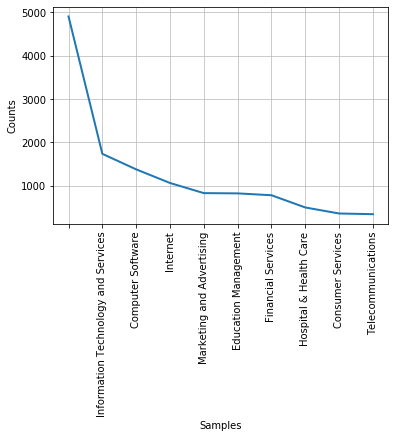

In [11]:
#freq dist plot to check which industry has more job posting 
import nltk
fdist = nltk.FreqDist(df_new["industry"])
fdist.values()
fdist.most_common()
# fdist(font.size': 22)
fdist.plot(10)

#### It can be seen that the Industry- Information Technology and Services has highest numbers of posts so we will look in to it for further analysis.

In [12]:
# here we have filtered our subset of dataset with Information Technology and Services as industry 
df_IT = df_new[df_new.industry == "Information Technology and Services"]
df_IT.head()

,industry,description,fraudulent,company_profile,benefits,requirements
8,Information Technology and Services,"[implementation, configuration, testing, train...",f,"[solutions3, woman, owned, small, business, wh...",[],"[must, u, citizen, active, sci, clearance, req..."
10,Information Technology and Services,"[position, url_86fd830a95a64e2b30ceed829e63fd3...",f,[],"[benefit, fullbonus, eligible, yesinterview, t...","[position, url_86fd830a95a64e2b30ceed829e63fd3..."
52,Information Technology and Services,"[namely, agile, startup, dedicated, building, ...",f,"[namely, leading, end, end, hr, payroll, platf...",[],"[qualification, payroll, payroll, tax, process..."
59,Information Technology and Services,"[apcera, revolutionizing, enterprise, technolo...",f,"[land, roll, sleeve, get, done, create, solve,...","[competitive, salary, amp, equitygreat, locati...","[responsibility, work, ux, architect, prototyp..."
79,Information Technology and Services,"[raygun, fast, growing, mindscape, product, ur...",f,"[mindscape, wellington, based, software, devel...","[part, fast, growing, company, team, direct, i...","[3, year, experience, project, product, manage..."


In [13]:
# Analysing the lemmas of the description column of job description for fraudulent true values

lemma_tokens_description  = df['description']

from collections import Counter

fraudulent_index = df['fraudulent'] == "t"


fraudulent_words = []
nonfraudulent_words = []


for items in lemma_tokens_description[fraudulent_index]:
    fraudulent_words.extend(items)    


for items in lemma_tokens_description[~fraudulent_index]:
    nonfraudulent_words.extend(items)

    
#counter function
counter_fraudwords = Counter(fraudulent_words)
counter_nonfraudwords = Counter(nonfraudulent_words)

# print(counter_fraudwords)
# print(counter_nonfraudwords)

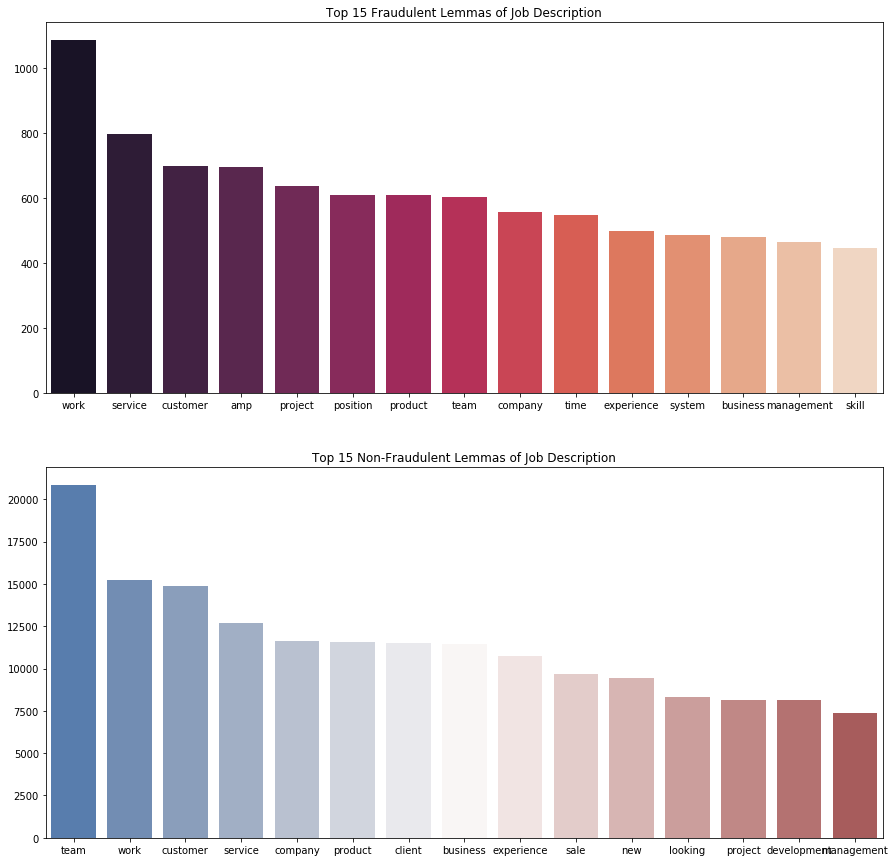

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 1, figsize=(15,15))


sns.barplot(x = [items[0] for items in counter_fraudwords.most_common(15)],y = [items[1] for items in counter_fraudwords.most_common(15)], ax=ax[0], palette="rocket")
ax[0].set_title('Top 15 Fraudulent Lemmas of Job Description')

sns.barplot(x = [items[0] for items in counter_nonfraudwords.most_common(15)],y = [items[1] for items in counter_nonfraudwords.most_common(15)], ax=ax[1],palette="vlag")
ax[1].set_title("Top 15 Non-Fraudulent Lemmas of Job Description");



#### From the above frequency charts of Fraudulent and Non-Fraudulent lemmas can bee seen. To get the more clear picture we can also analyse the n-grams further.

# Probability Distribution for Fraud and Legits using language Modeling technique - (N-grams)

In [15]:
# Subset of the data frame where fraudulent is true
fraud  = df_new[df_new.fraudulent == "t"]

In [16]:
# Subset of the data frame where fraudulent is true
legit  = df_new[df_new.fraudulent == "f"]

In [19]:
#Combined text of all the columumns for fraudulant true
text_fraud = fraud[fraud.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str).str.replace('[', '').str.replace(']', '')),axis=1)

# print(len(text_fraud))
# print(text_fraud.head())

In [20]:
#Combined text of all the column for fraudulant false
text_legit = legit[legit.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str).str.replace('[', '').str.replace(']', '')),axis=1)

# print(len(text_legit))
# print(text_legit.head())

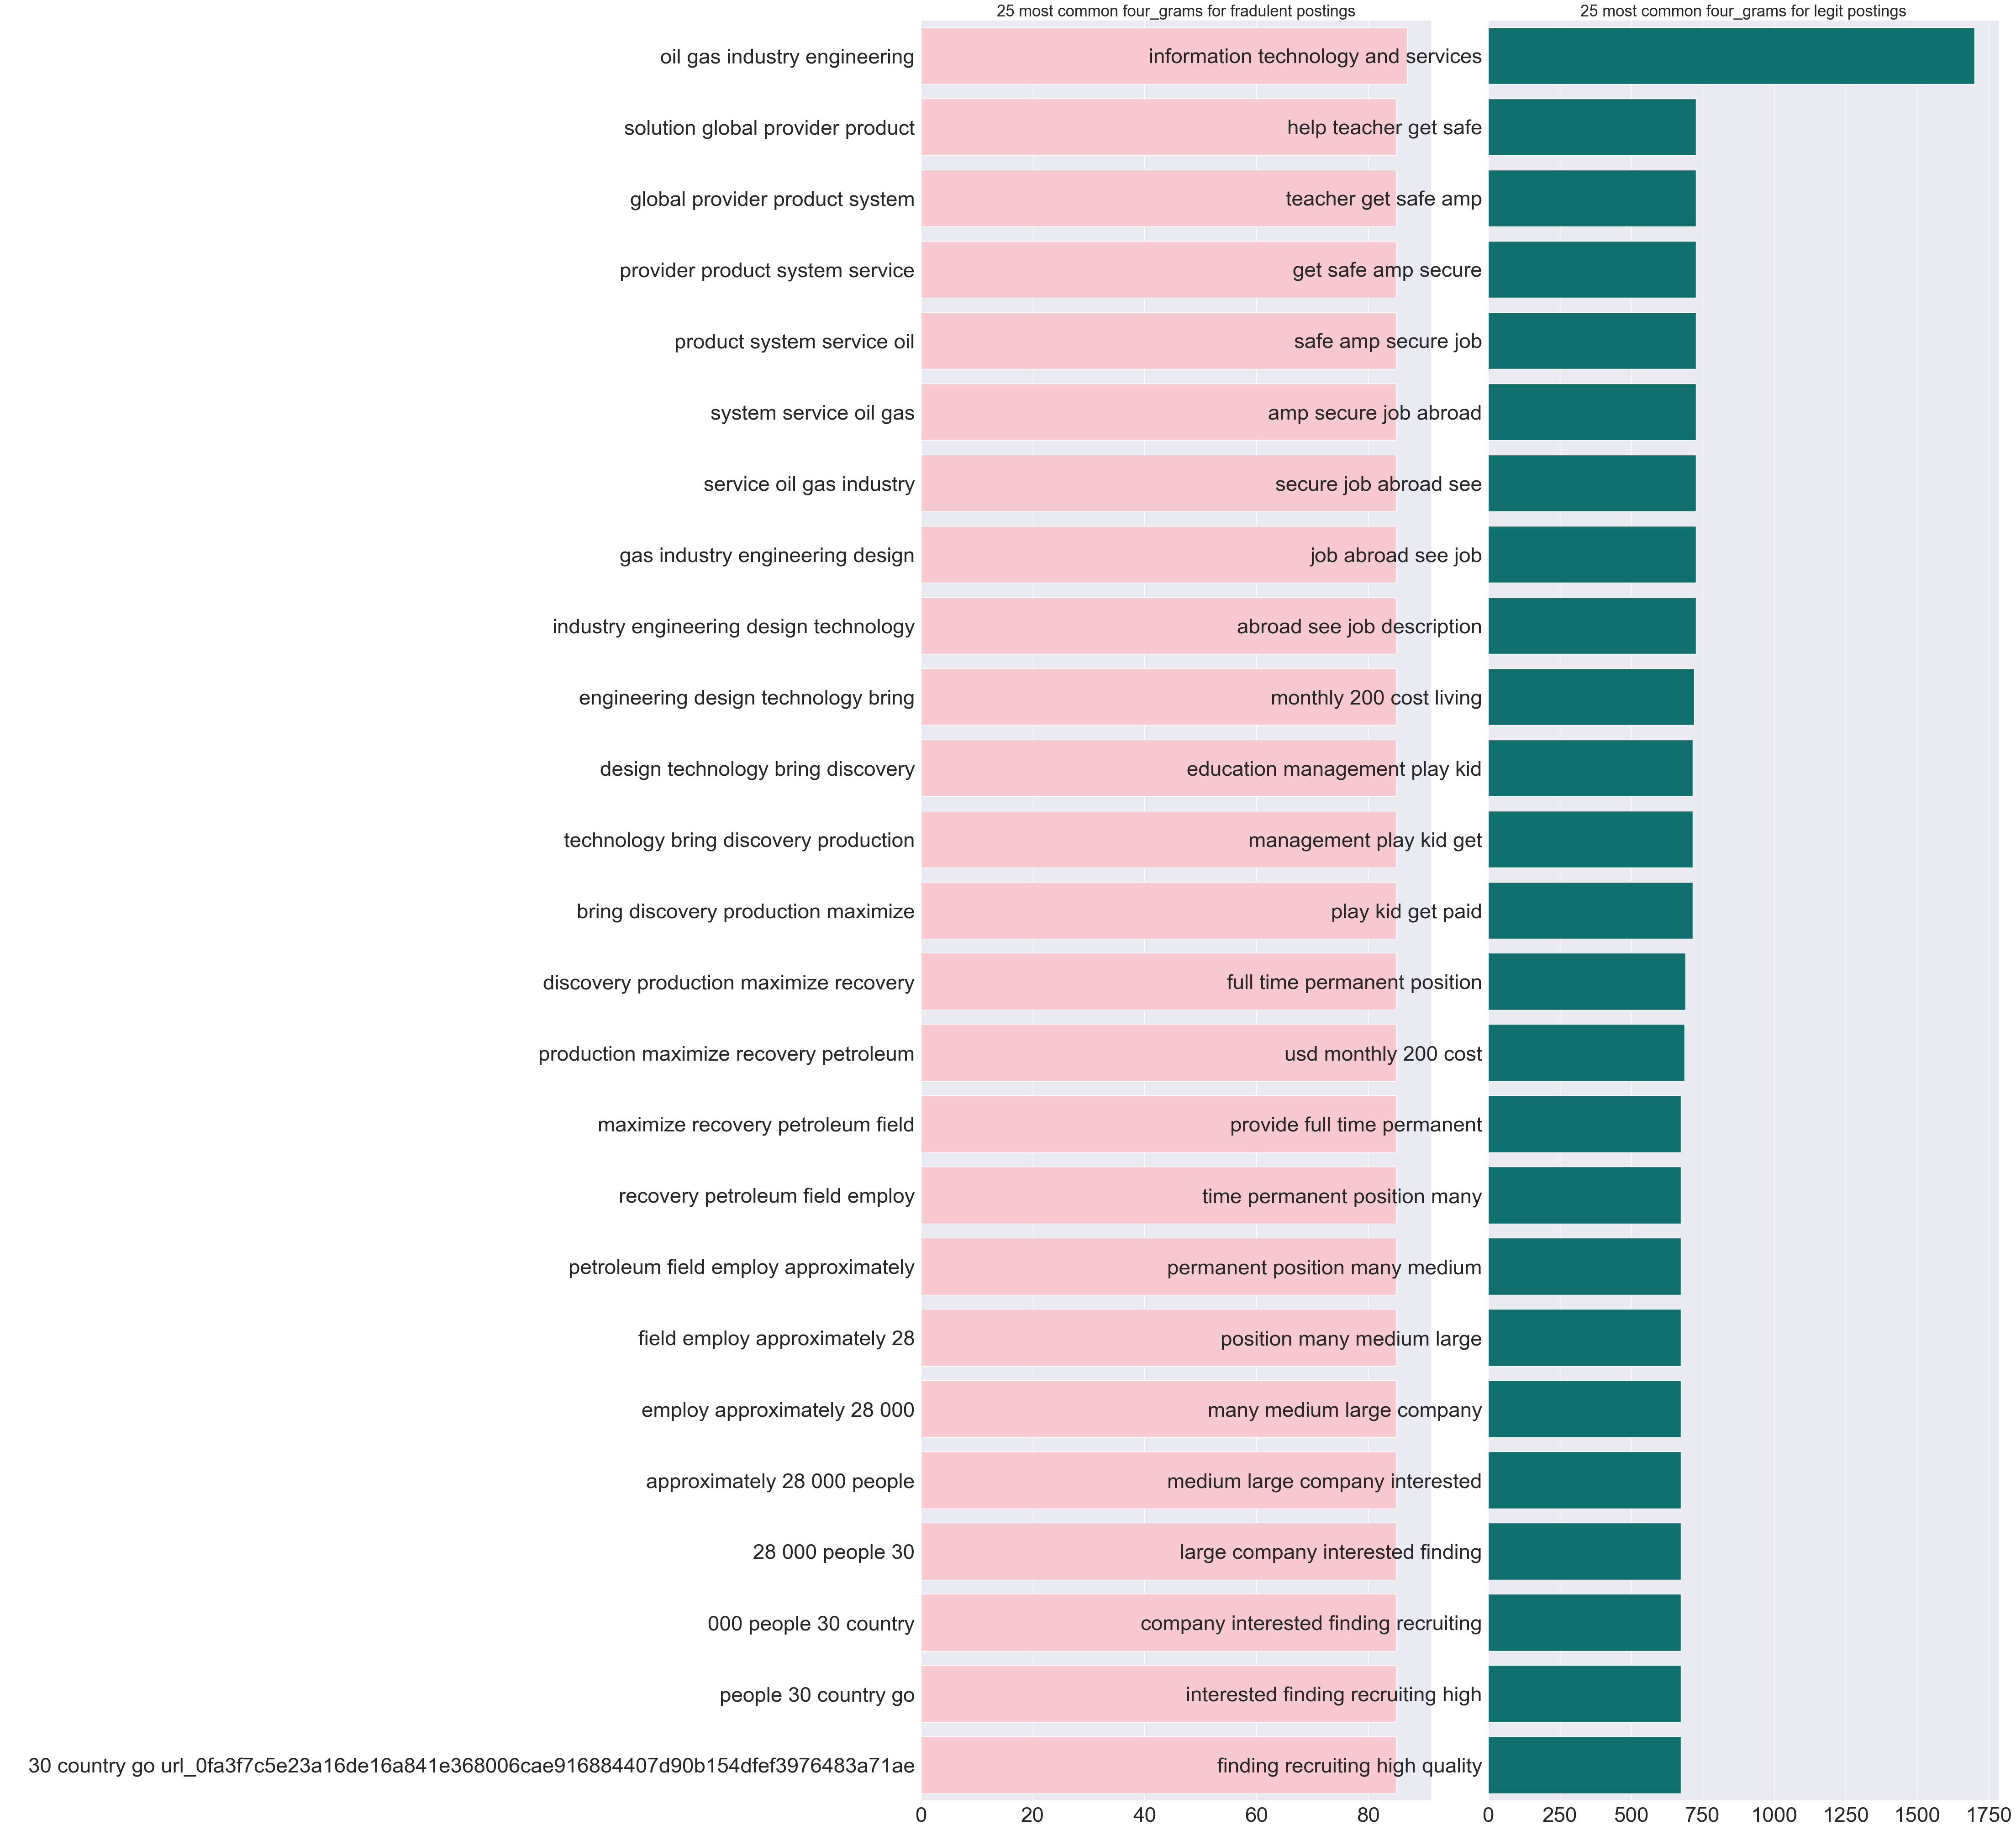

In [31]:
# Plotting 4-grams language model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def four_grams(corpus, n=None):
    cv = CountVectorizer(ngram_range=(4,4)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

fig, axes = plt.subplots(ncols=2, figsize=(25, 40), dpi=100)
plt.tight_layout()

top_fourgrams=four_grams(text_fraud)[:25]
x,y=map(list,zip(*top_fourgrams))
sns.barplot(x=y,y=x, ax=axes[0], color='pink')

top_fourgrams1=four_grams(text_legit)[:25]
x,y=map(list,zip(*top_fourgrams1))
sns.barplot(x=y,y=x, ax=axes[1], color='teal')

# sns.set(font_scale=3)


axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_title('25 most common four_grams for fradulent postings', fontsize=25)
axes[1].set_title('25 most common four_grams for legit postings', fontsize=25)

plt.show()

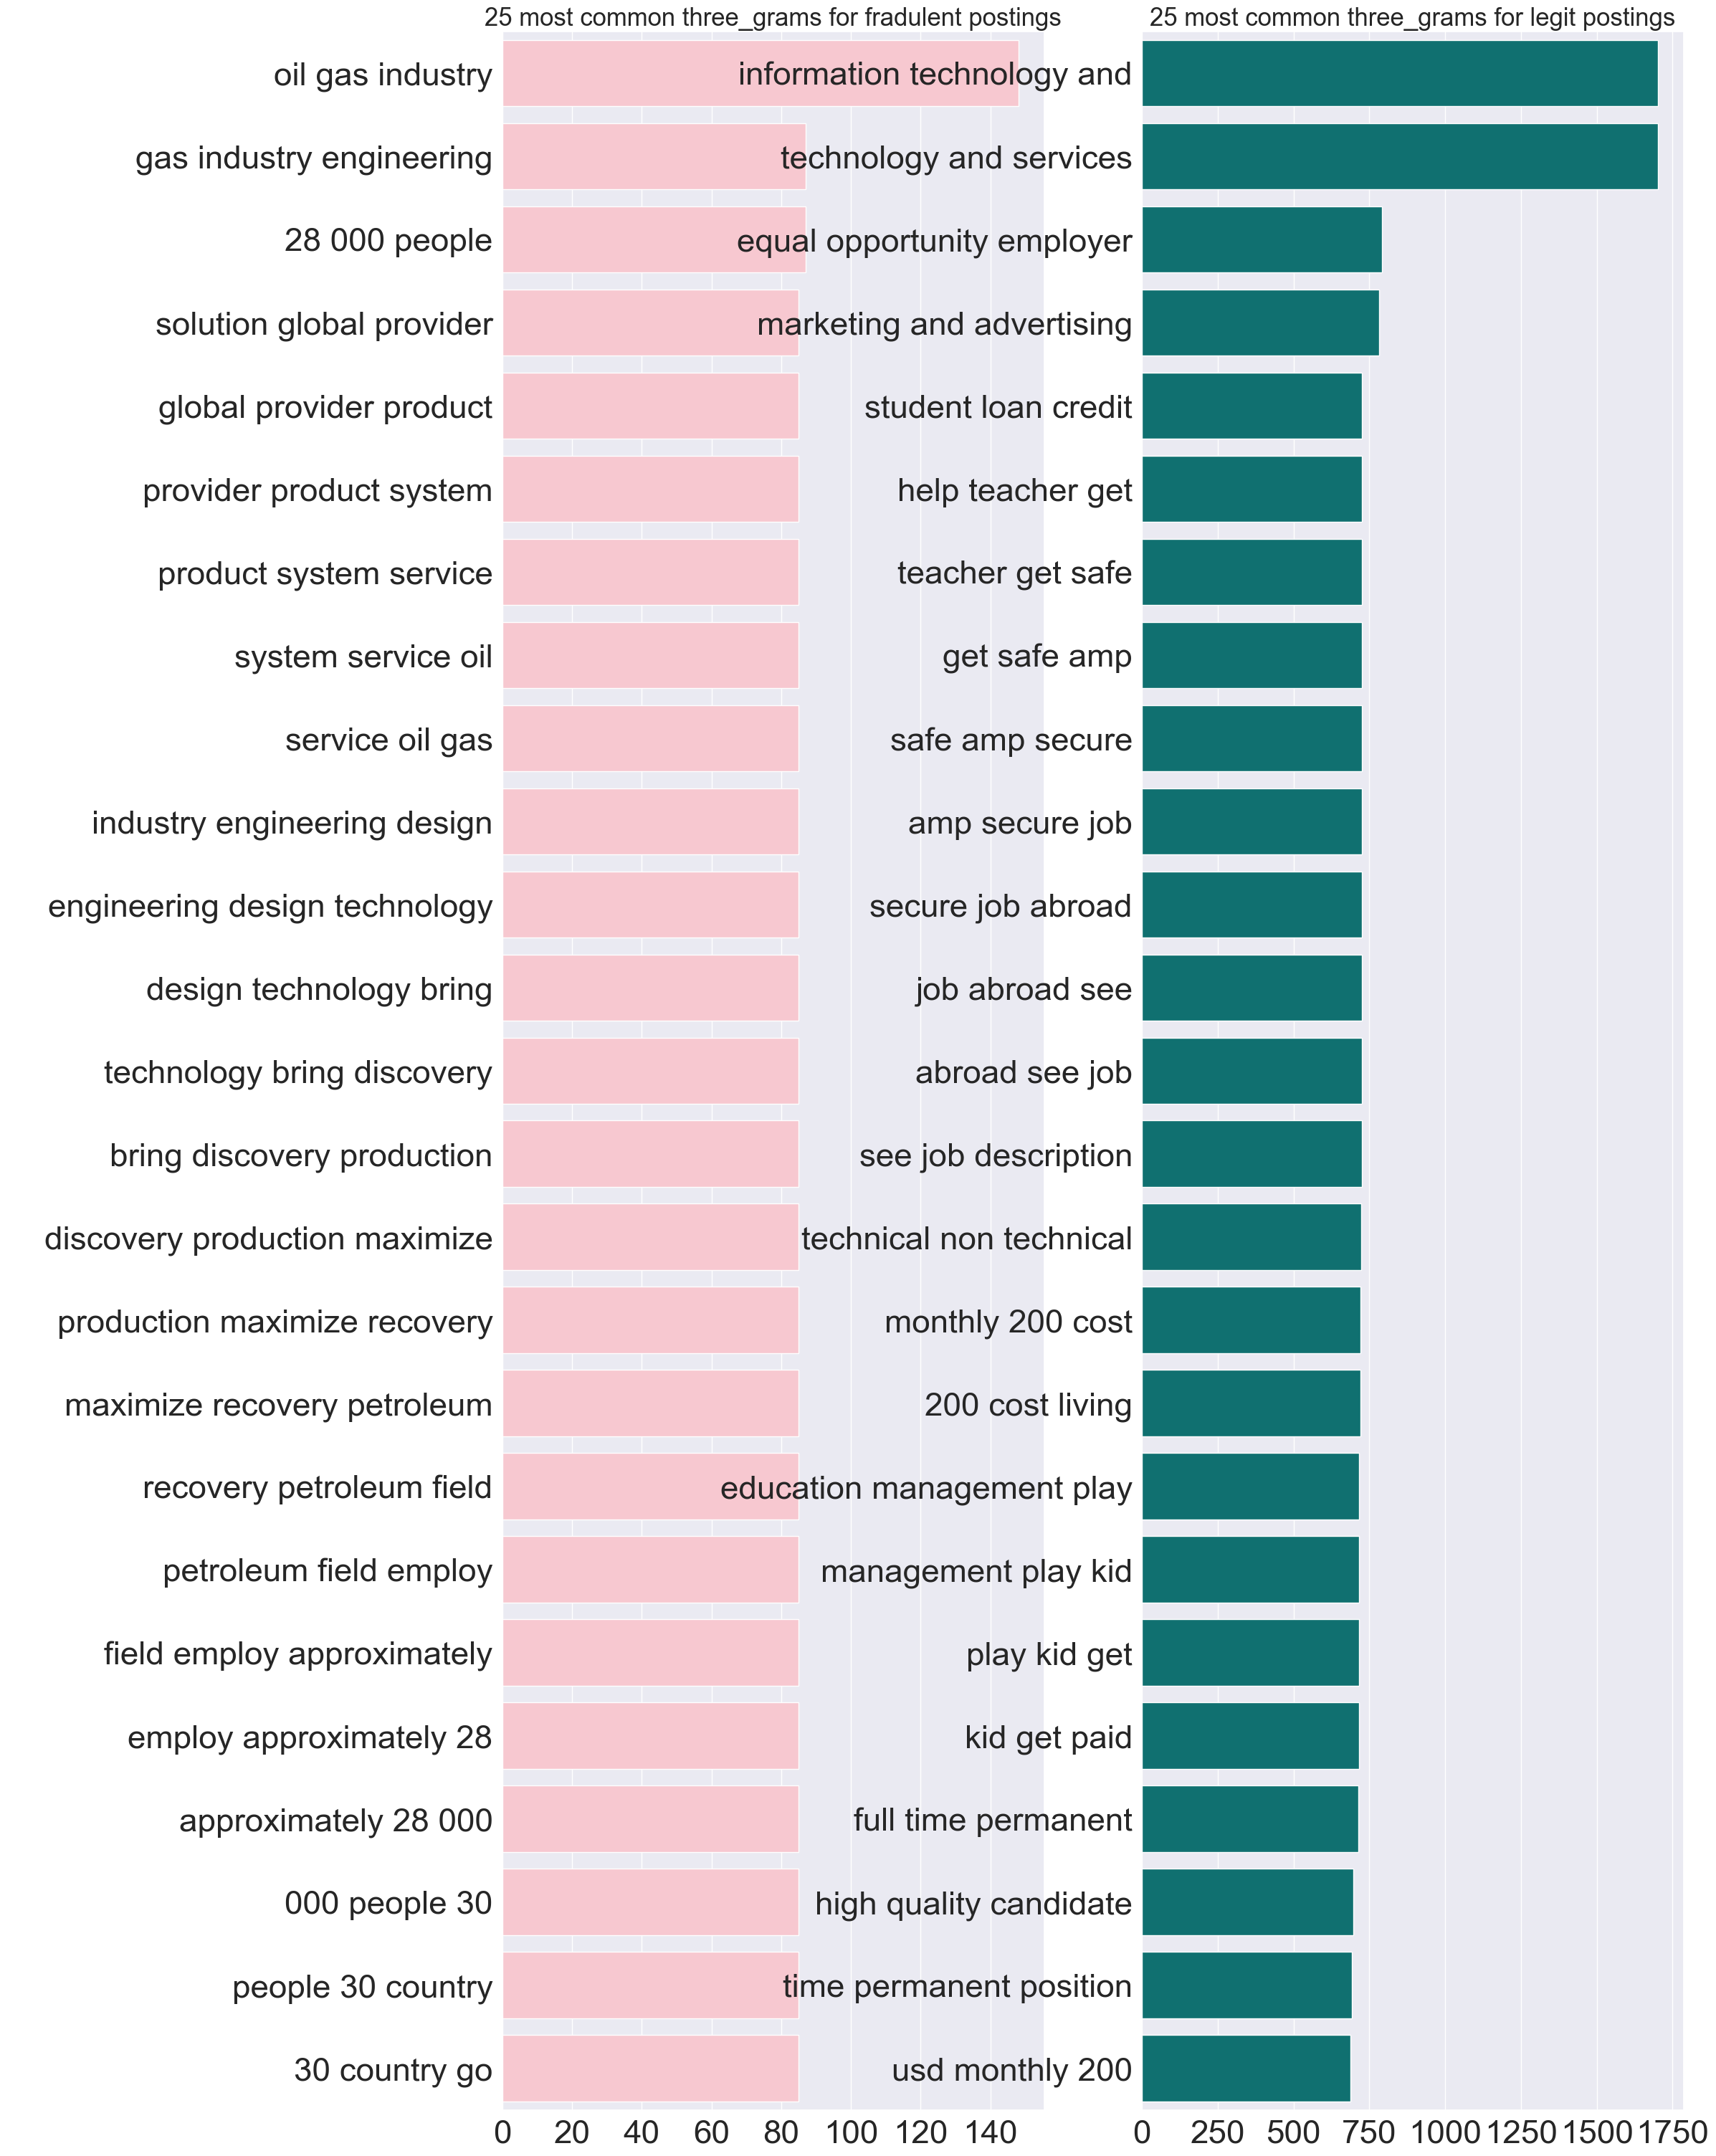

In [32]:
# Plotting 3-grams language model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def three_grams(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

fig, axes = plt.subplots(ncols=2, figsize=(18, 30), dpi=100)
plt.tight_layout()

top_threegrams_fraud=three_grams(text_fraud)[:25]
x,y=map(list,zip(*top_threegrams_fraud))
sns.barplot(x=y,y=x, ax=axes[0], color='pink')

top_threegrams_legit=three_grams(text_legit)[:25]
x,y=map(list,zip(*top_threegrams_legit))
sns.barplot(x=y,y=x, ax=axes[1], color='teal')

sns.set(font_scale=2)


axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_title('25 most common three_grams for fradulent postings', fontsize=25)
axes[1].set_title('25 most common three_grams for legit postings', fontsize=25)

plt.show()

# Word Cloud for Fraud Job Posting's Description and Requirement 

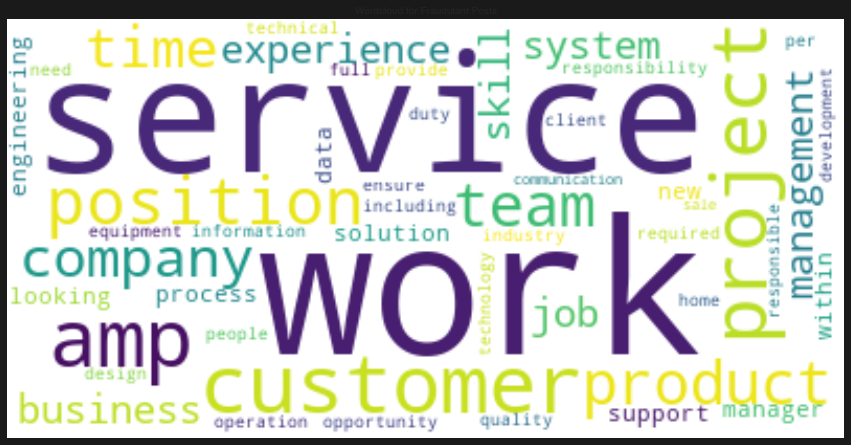

In [51]:
#look at the frequency distribution of single words
# pip install wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import wordcloud
from wordcloud import WordCloud
from collections import Counter 
fraudword_count = Counter()

#we are displaying cloud for description column only here 
fraud['description'].apply(fraudword_count.update)
plt.figure(figsize=(15,20),facecolor='k')
wordcloud_all = WordCloud(max_words=50,background_color="white").generate_from_frequencies(fraudword_count)
plt.title("Wordcloud for Fraudulant Posts", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud_all,interpolation='bilinear')
plt.show()

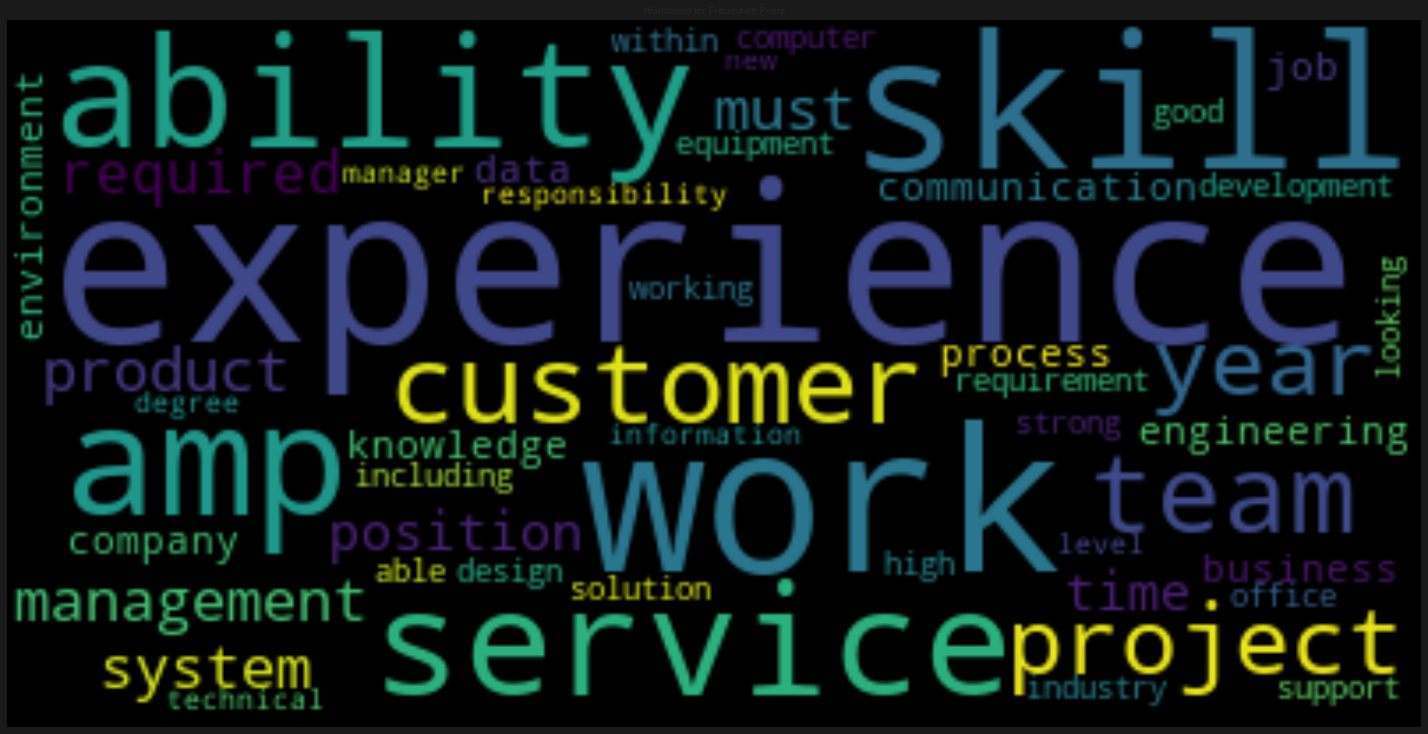

In [53]:
#we are displaying cloud for requirements column only here 
fraud['requirements'].apply(fraudword_count.update)
plt.figure(figsize=(20,10),facecolor='k')
wordcloud_all = WordCloud(max_words=50,background_color="black",).generate_from_frequencies(fraudword_count)
plt.title("Wordcloud for Fraudulant Posts", fontsize=10)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud_all,interpolation='bilinear')
plt.show()